In [1]:
%reload_ext autoreload
%autoreload 2
%reload_ext notexbook
%texify

In [22]:
from cellbgnet.simulation.psf_kernel import SMAPSplineCoefficient
import scipy.io as sio
import torch
from cellbgnet.generic.emitter import EmitterSet
import matplotlib.pyplot as plt

In [23]:
calib_file = '/Users/pk/work/SMLAT/data/bead_3dcal.mat'

In [24]:
psf_size = 31
xextent = [-0.5, 127.5]
yextent = [-0.5, 127.5]
zextent = [-400, 400]
scale = torch.tensor([(xextent[1] - xextent[0]),
                      (yextent[1] - yextent[0]),
                      (zextent[1] - zextent[0])])
shift = torch.tensor([xextent[0], yextent[0], zextent[0]])

In [25]:
psf = SMAPSplineCoefficient(calib_file=calib_file).init_spline(
xextent=[-0.5, 127.5], yextent=[-0.5, 127.5], img_shape=[128, 128], device='cpu', 
roi_size=None, roi_auto_center=None)

In [26]:
n = 10
xyz = torch.rand((n, 3)) * scale + shift
phot = torch.randint(4000, 6000, (n,))

In [27]:
em = EmitterSet(xyz=xyz, phot=phot,
                frame_ix=torch.zeros_like(phot).long(),
                id=torch.arange(n).long(),
                xy_unit='px',
                px_size=[65, 65]
               )

In [28]:
print(em)

EmitterSet
::num emitters: 10
::xy unit: px
::px size: tensor([65., 65.])
::frame range: 0 - 0
::spanned volume: [   2.756195    7.999954 -344.18292 ] - [121.20844  97.43554 398.0354 ]


In [29]:
image = psf.forward(em.xyz_px, em.phot, em.frame_ix, ix_low=0, ix_high = 0)

In [30]:
image.shape

torch.Size([1, 128, 128])

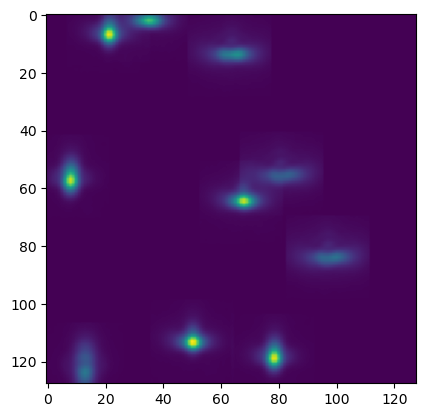

In [31]:
plt.figure()
plt.imshow(image[0].numpy())